In [31]:
!pip install emoji

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

import re
from datetime import datetime
import emoji

In [33]:
def extract_data(text):
    pattern = r'\[(\d{2}/\d{2}/\d{4}), (\d{2}:\d{2}:\d{2})\] (.+?): (.+)'
    matches = re.findall(pattern, text, re.MULTILINE)
    data = []

    system_generated_msgs = ["added", "removed", "left", "joined using this", "message was deleted", 'messages and calls are end-to-end encrypted', 'created this group']

    for match in matches:
        date, time, member, message = match

        # Determine message type
        if any(msg in message.lower() for msg in system_generated_msgs):
            msg_type = 'system'
        elif 'sticker omitted' in message.lower():
            msg_type = 'sticker'
        elif 'image omitted' in message.lower():
            msg_type = 'image'
        elif 'video omitted' in message.lower():
            msg_type = 'video'
        elif all(emoji.is_emoji(c) for c in message.strip()):
            msg_type = 'emoji'
        else:
            msg_type = 'text'

        # Count words
        word_count = len(message.split())

        # Count mentions
        mentions = message.count('@')

        # Extract emojis
        emojis = ''.join(c for c in message if emoji.is_emoji(c))
        emojis = emojis if emojis else '[]'  # Use '[]' if no emojis

        # Message length
        msg_length = len(message)

        data.append([date, time, member, message, msg_type, msg_length, word_count, mentions, emojis])

    return data

# Read the file
with open('_chat.txt', 'r', encoding='utf-8') as file:
    chat_text = file.read()

# Create the dataframe
df = pd.DataFrame(extract_data(chat_text),
                  columns=['dates', 'times', 'members', 'messages', 'message_types',
                           'message_lengths', 'word_counts', 'mentions', 'emojis'])

# Convert date and time columns
df['dates'] = pd.to_datetime(df['dates'], format='%d/%m/%Y')
df['times'] = pd.to_datetime(df['times'], format='%H:%M:%S').dt.time

In [34]:
# Displays first five rows of the DataFrame
df.head()

,dates,times,members,messages,message_types,message_lengths,word_counts,mentions,emojis
0,2021-09-27,17:09:48,HBD MERCY AND NINI🥳🥳🎂,‎Messages and calls are end-to-end encrypted. ...,system,121,21,0,[]
1,2021-09-27,17:09:48,~ UNIQUE 🔱,‎~ UNIQUE 🔱 created this group,system,30,6,0,🔱
2,2021-09-27,17:09:48,HBD MERCY AND NINI🥳🥳🎂,‎You were Added to a Group in the Community: U...,system,66,11,0,📊🧭🦠🔬🧪
3,2024-01-20,13:15:00,~ Nellz,Happy birthday to my baby @2349027685489 We g...,text,77,10,1,🎊🎊🤩🤩🤩🤩🤩
4,2024-01-20,13:18:34,~ Fhavorette🥰,Thanks @2348122244039,text,21,2,1,[]


In [35]:
# Displays rive random rows in the DataFrame
df.sample(n=5)

,dates,times,members,messages,message_types,message_lengths,word_counts,mentions,emojis
7633,2024-02-19,08:43:18,~ ♱,‎sticker omitted,sticker,16,2,0,[]
23679,2024-05-05,02:58:44,~ -~Pablo,"lol, it has ended? ‎<This message was edited>",text,45,8,0,[]
35039,2024-06-25,13:24:32,Kolareal,TAKE NOTE:,text,10,2,0,[]
42377,2024-07-11,18:47:48,~ Din_Djarin🥇,"Later, they will be blaming the government.",text,43,7,0,[]
23839,2024-05-07,09:41:52,Pere,Page 4.pdf • ‎1 page ‎document omitted,text,38,7,0,[]


In [36]:
# Displays the last five rows of the DataFrame
df.tail()

,dates,times,members,messages,message_types,message_lengths,word_counts,mentions,emojis
56020,2024-08-22,19:01:06,Kolareal,Happy Birthday to you🎊🎊🎊🎊🎉🎉🎉🎉🎉🥳🥳🥳🥳👍@2349029109...,text,146,21,2,🎊🎊🎊🎊🎉🎉🎉🎉🎉🥳🥳🥳🥳👍✅😇
56021,2024-08-22,19:21:18,~ Sabi Girl♍,Happy birthday to you dear 🎉🥳@2349029109937,text,43,6,1,🎉🥳
56022,2024-08-22,19:21:34,Kolareal,‎This message was deleted.,system,26,4,0,[]
56023,2024-08-22,19:28:24,Kolareal,‎image omitted,image,14,2,0,[]
56024,2024-08-22,19:29:02,Victory,Happy birthday @2349029109937 and @2348054804...,text,93,14,2,[]


In [37]:
df.shape

(56025, 9)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56025 entries, 0 to 56024
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   dates            56025 non-null  datetime64[ns]
 1   times            56025 non-null  object        
 2   members          56025 non-null  object        
 3   messages         56025 non-null  object        
 4   message_types    56025 non-null  object        
 5   message_lengths  56025 non-null  int64         
 6   word_counts      56025 non-null  int64         
 7   mentions         56025 non-null  int64         
 8   emojis           56025 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 3.8+ MB


In [39]:
df.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
message_lengths,56025.0,34.981294,43.102630,1.0,14.0,22.0,43.0,3982.0
word_counts,56025.0,6.279768,7.173774,1.0,2.0,4.0,8.0,239.0
mentions,56025.0,0.074288,0.332044,0.0,0.0,0.0,0.0,23.0


In [40]:
df['members'].unique()

array(['HBD MERCY AND NINI🥳🥳🎂', '~\u202fUNIQUE 🔱', '~\u202fNellz',
       '~\u202fFhavorette🥰', 'Fakem', 'Mike Shabande', 'Mister Olufemi',
       "O'VeesBee 🦋 🤎🎀", '~\u202f-~Pablo', '~\u202fID', 'SimiloluwaFFS',
       '~\u202fShaals_by_Hikmah🧕🛍️',
       '\u202a+234\xa0810\xa0950\xa02031\u202c', '~\u202fGuided 🥰',
       'Pere', '~\u202fLucy Care Beauty', '~\u202fBukky💫',
       '~\u202fEdimoya🦁', '~\u202fMunirat Atunrase',
       '~\u202fAdelanwa Bolanle', '~\u202fPhilip',
       '~\u202fAnastasia❤️\u200d🔥', '~\u202fFari🧋', 'LEENAH', 'Idowu',
       '~\u202fPaulina', '~\u202fÇhïêf', '~\u202f✨NUSMOJ💫',
       'GS. Maverick', '~\u202fCookie', '~\u202fDangotress 💪',
       '~\u202fTreasure', '~\u202f♱', '~\u202fBeautyprenuer', 'Timmy',
       '~\u202fAmicable💋💕', 'Solomon Ebenezer Onah', 'Kolareal',
       '~\u202fDin_Djarin🥇', '~\u202fChoppa(סטיבן)',
       '~\u202fVerasun_Network Service', '~\u202fOlaniyi', 'Ayo',
       '~\u202fOghenetega🌸', '~\u202fPeace🥰😍', '~\u202fGeneral Da Vinc

# Data Cleaning

In [41]:
def clean_member_data(data):
    if not isinstance(data, str):
        return data

    # Check if the data is a phone number
    if re.match(r'\u202a\+?\d', data):
        # Clean phone number
        cleaned = re.sub(r'\D', '', data)
        if cleaned.startswith('234'):
            cleaned = '+' + cleaned
        if len(cleaned) == 13:  # +234 format
            return f"{cleaned[:4]} {cleaned[4:7]} {cleaned[7:10]} {cleaned[10:]}"
        elif len(cleaned) == 11:  # 0 format
            return f"{cleaned[:4]} {cleaned[4:7]} {cleaned[7:]}"
        else:
            return cleaned
    else:
        # Clean name
        return data.lstrip('~\u202f')


df1 = df.copy()
df1['members'] = df1['members'].apply(clean_member_data)

In [42]:
df1['members'].unique()

array(['HBD MERCY AND NINI🥳🥳🎂', 'UNIQUE 🔱', 'Nellz', 'Fhavorette🥰',
       'Fakem', 'Mike Shabande', 'Mister Olufemi', "O'VeesBee 🦋 🤎🎀",
       '-~Pablo', 'ID', 'SimiloluwaFFS', 'Shaals_by_Hikmah🧕🛍️',
       '+2348109502031', 'Guided 🥰', 'Pere', 'Lucy Care Beauty', 'Bukky💫',
       'Edimoya🦁', 'Munirat Atunrase', 'Adelanwa Bolanle', 'Philip',
       'Anastasia❤️\u200d🔥', 'Fari🧋', 'LEENAH', 'Idowu', 'Paulina',
       'Çhïêf', '✨NUSMOJ💫', 'GS. Maverick', 'Cookie', 'Dangotress 💪',
       'Treasure', '♱', 'Beautyprenuer', 'Timmy', 'Amicable💋💕',
       'Solomon Ebenezer Onah', 'Kolareal', 'Din_Djarin🥇',
       'Choppa(סטיבן)', 'Verasun_Network Service', 'Olaniyi', 'Ayo',
       'Oghenetega🌸', 'Peace🥰😍', 'General Da Vinci', 'Angel✨',
       'THAT 🇳🇬 YORUBA 🇳🇬 BOY', 'O.T.D', 'Adalicious', 'Wisdom',
       'PreciousPromise😍🥰😘', 'T', 'Anita Darling 😘💞💖❣️', 'Oolamhi 💕💕',
       'HalQotul Fawz Academy', 'amdevv', 'Adebori🪅🤍', 'Bodunrin Bukky',
       'Moz', "Lewa's Cakes & Pastries🎂🥯", 'Ilori Tol

In [43]:
df1 = df1[df1['members'] != 'HBD MERCY AND NINI🥳🥳🎂']

In [44]:
# df1.head()
cutoff_date = pd.to_datetime('2024-01-20')


df2 = df1.copy()
# Filtering the DataFrame to keep only rows with dates on or after 2024-01-20
df2 = df2[df2['dates'] >= cutoff_date]

df2 = df2.reset_index(drop=True)

In [45]:
df2.sample(n=5)

,dates,times,members,messages,message_types,message_lengths,word_counts,mentions,emojis
31371,2024-06-03,12:23:57,Adalicious,Welcome back @2349027954495,text,28,3,1,[]
30176,2024-05-31,22:26:22,Immaculate👑🌏🌈⭐❤️💯,By there words we shall know them... I can gue...,text,78,17,0,[]
34047,2024-06-18,12:48:48,Edimoya🦁,Quick question is kote the English Abi Yoruba ...,text,65,12,0,🤲
50939,2024-07-31,17:45:03,Nellz,Which he didn’t do!,text,19,4,0,[]
8819,2024-02-23,10:40:43,Opeyemi,@2347081075425,text,14,1,1,[]


In [46]:
# keeping only 'text' message types
df3 = df2.copy()
df3 = df3[df3['message_types'] == 'text']

In [47]:
df3['message_types'].unique()

array(['text'], dtype=object)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


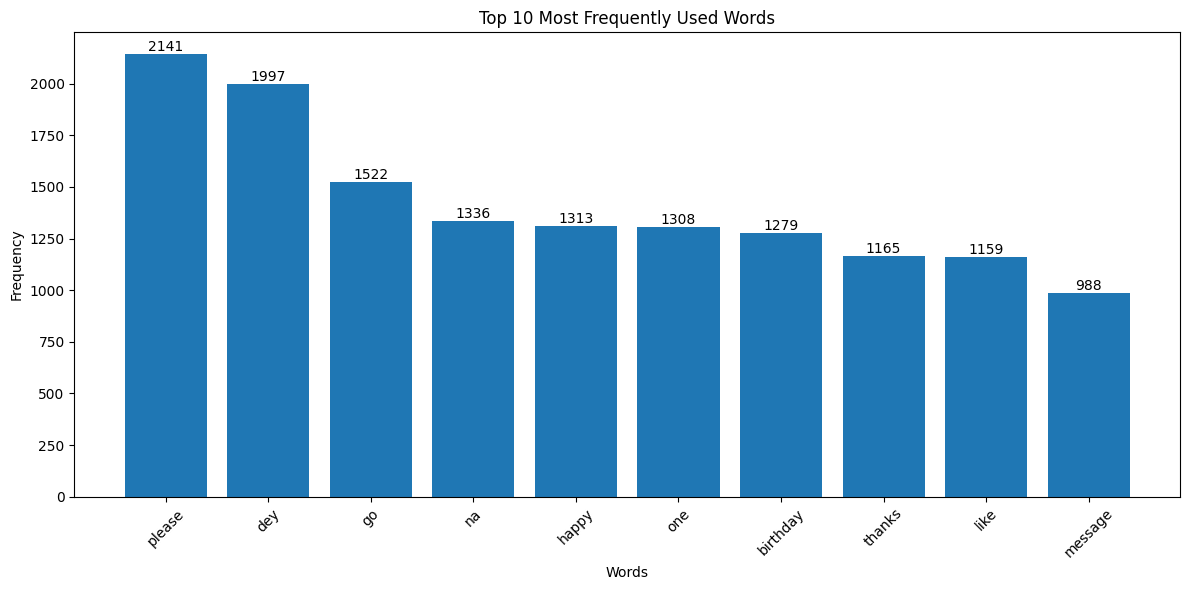

In [48]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def process_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Combine all messages into a single text
all_text = ' '.join(df3['messages'].astype(str))

# Process the text
words = process_text(all_text)

# Count word frequencies
word_freq = FreqDist(words)

# Get the top 10 words
top_10_words = word_freq.most_common(10)

# Create lists for words and their frequencies
words, frequencies = zip(*top_10_words)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.title('Top 10 Most Frequently Used Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Add frequency labels on top of each bar
for i, v in enumerate(frequencies):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Top 10 Most Active Members:
members
GS. Maverick      4397
Anastasia❤️‍🔥     3688
Olaniyi           2979
O.T.D             2769
Dangotress 💪      2754
Pere              2648
Din_Djarin🥇       1575
Kolareal          1530
Mister Olufemi    1420
Mimi💕             1022
Name: count, dtype: int64


<ipython-input-49-688d65255e37>:12: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
<ipython-input-49-688d65255e37>:12: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from current font.
  plt.tight_layout()
<ipython-input-49-688d65255e37>:12: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from current font.
  plt.tight_layout()
<ipython-input-49-688d65255e37>:12: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) m

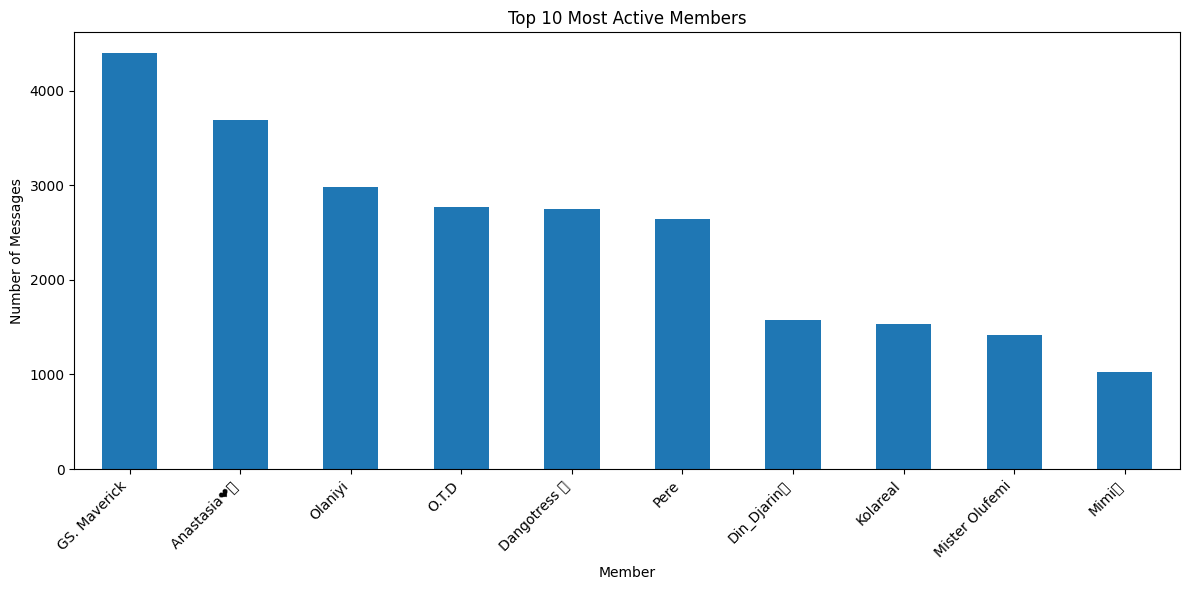

In [49]:
# 2. Message Count by Member
member_counts = df3['members'].value_counts()
print("\nTop 10 Most Active Members:")
print(member_counts.head(10))

plt.figure(figsize=(12, 6))
member_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Active Members')
plt.xlabel('Member')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Top 10 Most Inactive Members:
members
Tolu                     3
Vidalina💕                2
Mu'eenah💝                2
Stephen Sam              2
Omobolanle               1
Mama Faith               1
Eneofoyi🥰                1
Awai                     1
Homor_Tola Emporium👑✨    1
+2348109502031           1
Name: count, dtype: int64


<ipython-input-50-23876aa79d7a>:11: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  plt.tight_layout()
<ipython-input-50-23876aa79d7a>:11: UserWarning: Glyph 128157 (\N{HEART WITH RIBBON}) missing from current font.
  plt.tight_layout()
<ipython-input-50-23876aa79d7a>:11: UserWarning: Glyph 129392 (\N{SMILING FACE WITH SMILING EYES AND THREE HEARTS}) missing from current font.
  plt.tight_layout()
<ipython-input-50-23876aa79d7a>:11: UserWarning: Glyph 128081 (\N{CROWN}) missing from current font.
  plt.tight_layout()
<ipython-input-50-23876aa79d7a>:11: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128157 (\N{HEART WITH RIBBON}) missing from current fo

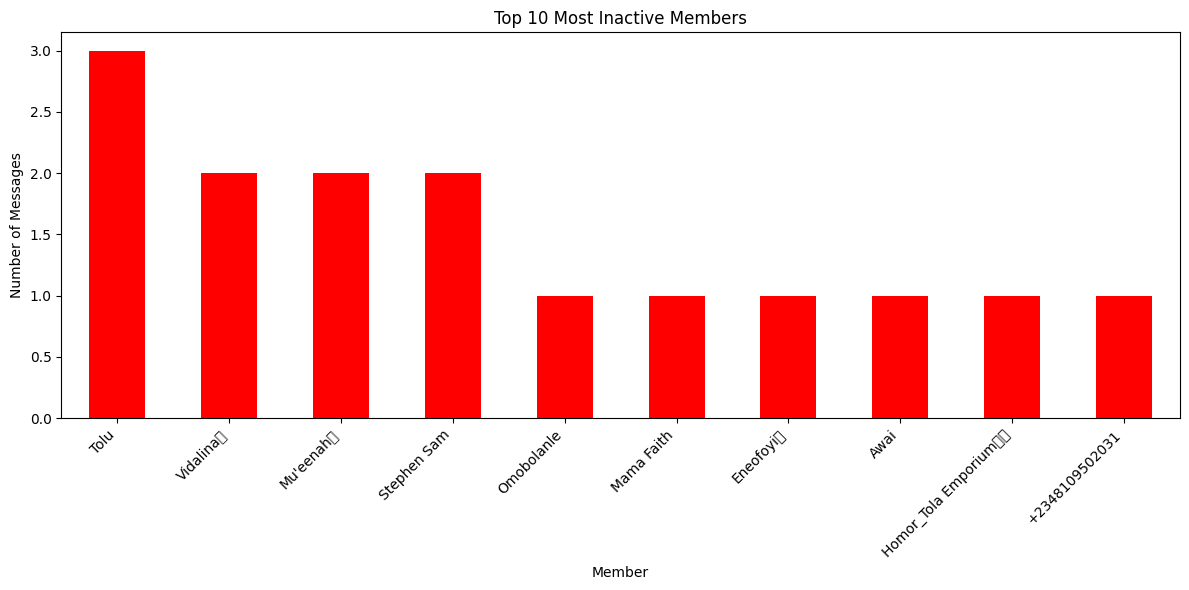

In [50]:
member_counts = df3['members'].value_counts()
print("\nTop 10 Most Inactive Members:")
print(member_counts.tail(10))

plt.figure(figsize=(12, 6))
member_counts.tail(10).plot(kind='bar', color='#FF0000')  # Set the color to red
plt.title('Top 10 Most Inactive Members')
plt.xlabel('Member')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Message Type Distribution:
message_types
text       47474
sticker     4421
image       1665
system      1324
emoji       1017
video        120
Name: count, dtype: int64


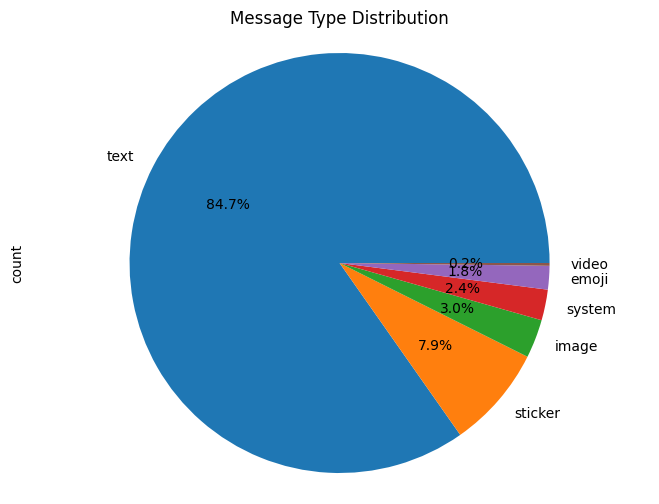

In [51]:
# 3. Message Types Distribution
type_counts = df2['message_types'].value_counts()
print("\nMessage Type Distribution:")
print(type_counts)

plt.figure(figsize=(8, 6))
type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Message Type Distribution')
plt.axis('equal')
plt.show()

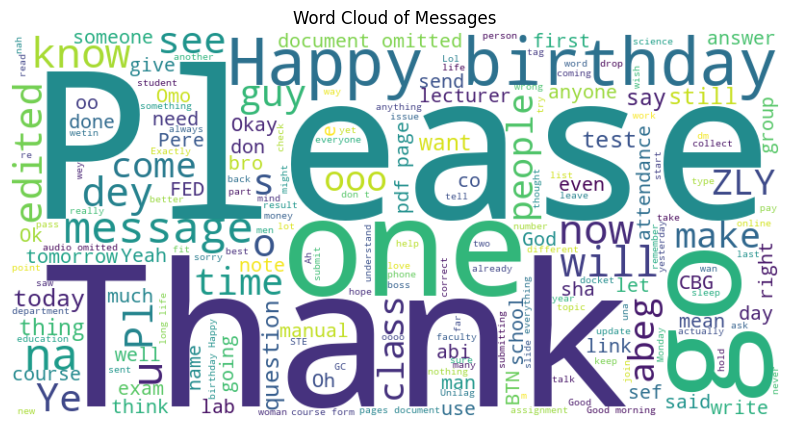

In [52]:
# 4. Word Cloud
text = ' '.join(df3['messages'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Messages')
plt.show()

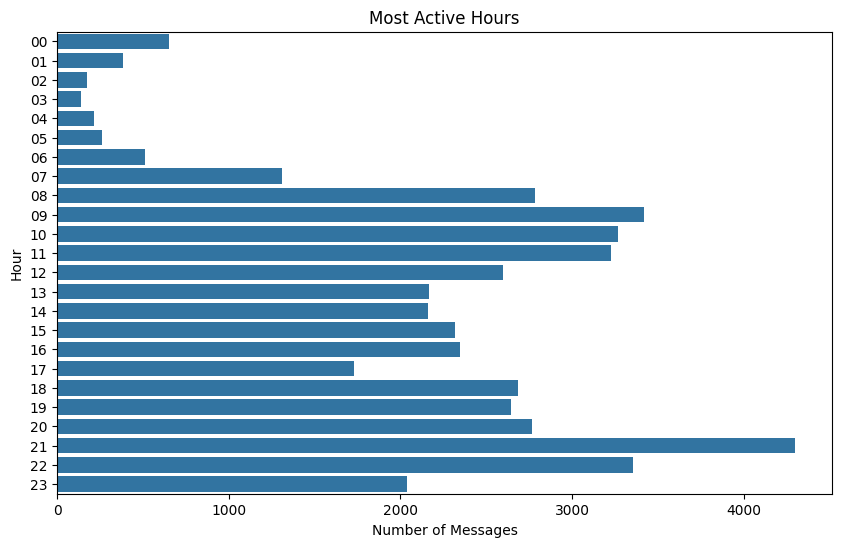

In [53]:
df4 = df3.copy()
df4['times'] = df4['times'].astype(str)

# Extracting the hour from 'times'
df4['hour'] = df4['times'].str.split(':').str[0]

# Aggregating the data by hour
hourly_counts = df4.groupby('hour')['messages'].count().reset_index()
hourly_counts.columns = ['hour', 'message_count']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_counts, x='message_count', y='hour')

plt.title('Most Active Hours')
plt.xlabel('Number of Messages')
plt.ylabel('Hour')
plt.show()


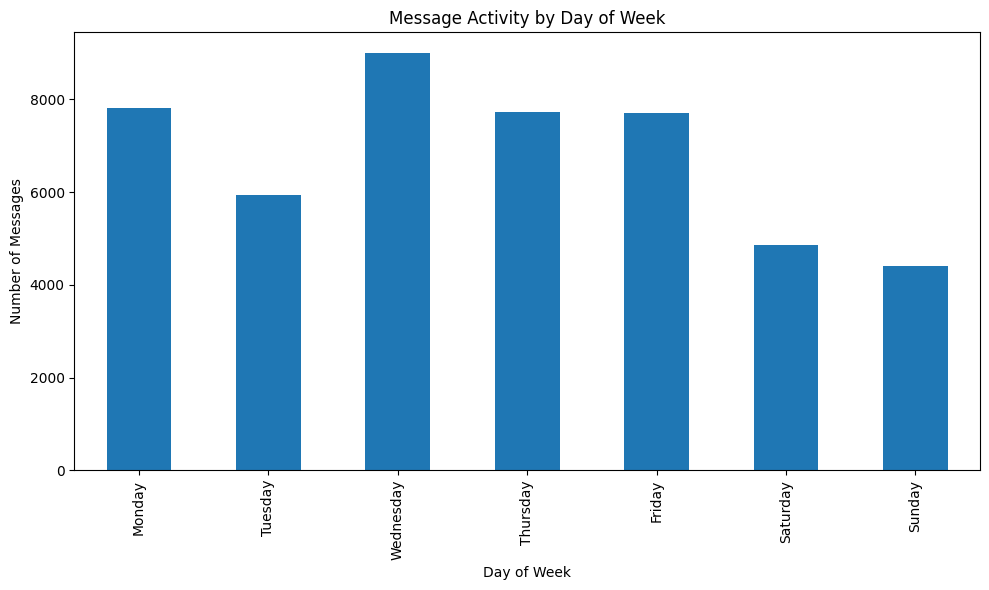

In [54]:
#6. Most Active Days
df4['day_of_week'] = df4['dates'].dt.day_name()
day_activity = df4['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
day_activity.plot(kind='bar')
plt.title('Message Activity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Messages')
plt.tight_layout()
plt.show()

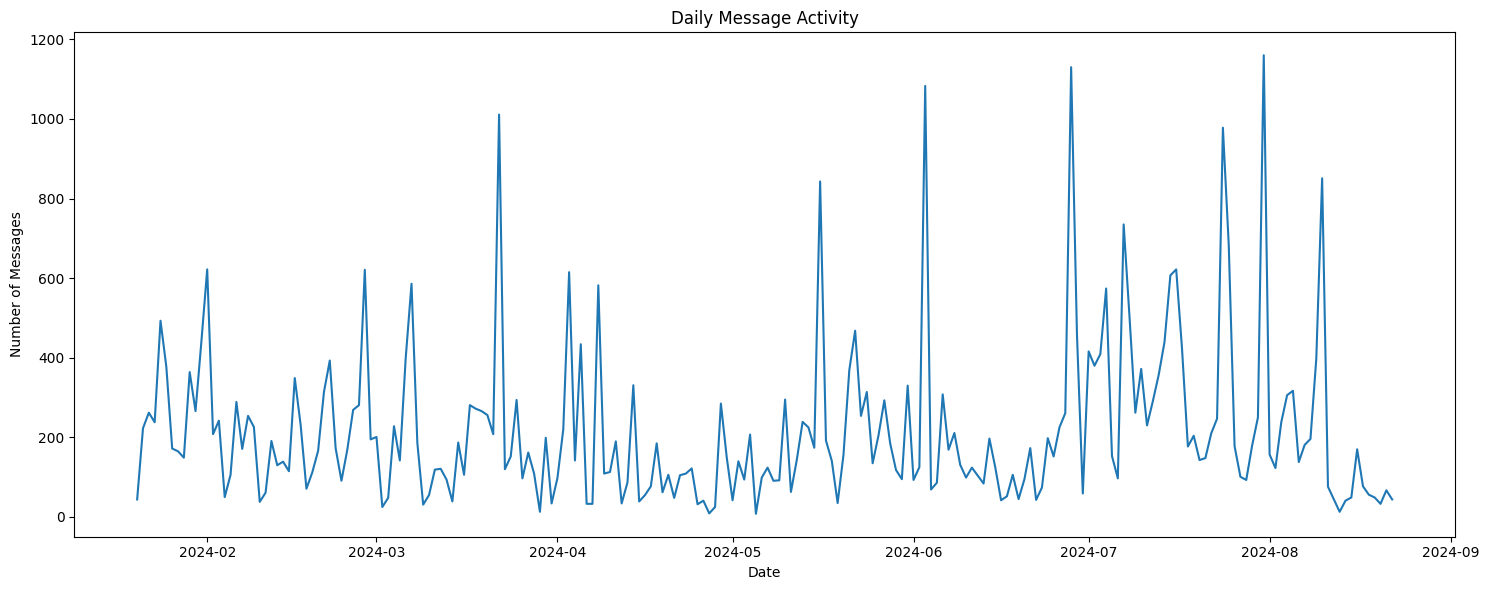

In [55]:
# 4. Activity Over Time
df4['date'] = pd.to_datetime(df4['dates'])
daily_activity = df4.groupby(df4['date'].dt.date).size()

plt.figure(figsize=(15, 6))
daily_activity.plot()
plt.title('Daily Message Activity')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.tight_layout()
plt.show()

In [56]:
import collections

total_emojis_list = list([a for b in df4.emojis for a in b])
emoji_dict = dict(collections.Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

emoji_df = pd.DataFrame(emoji_dict, columns=['Emoji', 'Frequency'])

In [57]:
# emoji_df = emoji_df[emoji_df['Emoji'] !='[',']']
emoji_df1 = emoji_df[~emoji_df['Emoji'].isin(['[', ']'])]

In [58]:
emoji_df1 = emoji_df1.reset_index(drop = True)

emoji_df1.head(10)

,Emoji,Frequency
0,😂,6499
1,‼,2714
2,😅,1152
3,😭,1082
4,🎂,917
5,🥳,887
6,❗,880
7,🙏,816
8,🎉,770
9,🤣,616
